In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pandas import DataFrame
import csv

In [2]:
data = pd.read_csv('Sale_Prices_Msa.csv')
data
data_cleaned = data.fillna(0)
data_cleaned.count()
months = data_cleaned.drop(columns=['RegionID','RegionName', 'SizeRank'])
months.head()

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,188300.0,184700.0,180700.0,176800.0,175100.0,174200.0,173200.0,171500.0,169300.0,166400.0,...,229400.0,232500.0,232300.0,229700.0,227600.0,226700.0,226200.0,226100.0,225900.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,381800.0,383000.0,386900.0,389400.0,389900.0,389700.0,389300.0,390700.0,389500.0,0.0
2,475500.0,463300.0,447300.0,436200.0,420600.0,406600.0,390600.0,379200.0,368200.0,357800.0,...,602300.0,610100.0,611400.0,614000.0,615300.0,622500.0,626600.0,0.0,0.0,0.0
3,257600.0,254100.0,238600.0,225300.0,223000.0,222300.0,226300.0,224500.0,222400.0,218800.0,...,217900.0,227300.0,229200.0,226300.0,222600.0,223200.0,222500.0,219800.0,219100.0,226200.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246100.0,248900.0,249000.0,246100.0,244200.0,246300.0,245900.0,248100.0,246700.0,0.0


In [3]:
months.groupby(pd.PeriodIndex(months.columns, freq='Y'), axis=1).mean()
annual_amounts = months.groupby(pd.PeriodIndex(months.columns, freq='Y'), axis=1).mean()
annual_amounts.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,176020.0,157408.333333,159675.000000,151383.333333,154466.666667,170008.333333,178408.333333,191041.666667,200841.666667,213566.666667,207481.818182
1,0.0,0.000000,30283.333333,352216.666667,332766.666667,341833.333333,352316.666667,355700.000000,360608.333333,371466.666667,351981.818182
2,414530.0,339816.666667,366166.666667,348550.000000,357741.666667,434925.000000,465800.000000,497658.333333,526775.000000,547400.000000,445527.272727
3,231290.0,198616.666667,189008.333333,170516.666667,161933.333333,177491.666667,196825.000000,197391.666667,189933.333333,202741.666667,222454.545455
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134791.666667,214266.666667,232525.000000,223936.363636


In [4]:
new_df = pd.DataFrame({"City": data_cleaned['RegionName']} )

combined = new_df.join(annual_amounts, how='outer')
combined.set_index("City", inplace=True)

charlotte_data = pd.DataFrame(combined.loc["Charlotte, NC"])
raleigh_data = pd.DataFrame(combined.loc["Raleigh, NC"])
united_states = pd.DataFrame(combined.loc['United States'])


combined_nc = charlotte_data.join(raleigh_data, how='outer')
combined_cities = combined_nc.join(united_states, how='outer')
combined_cities

,"Charlotte, NC","Raleigh, NC",United States
2008,150200.000000,175540.000000,176020.000000
2009,148566.666667,173100.000000,157408.333333
2010,149850.000000,179091.666667,159675.000000
2011,150566.666667,180258.333333,151383.333333
2012,155525.000000,176858.333333,154466.666667
2013,164058.333333,187541.666667,170008.333333
2014,170116.666667,191416.666667,178408.333333
2015,179866.666667,210966.666667,191041.666667
2016,187466.666667,221350.000000,200841.666667
2017,191941.666667,235375.000000,213566.666667


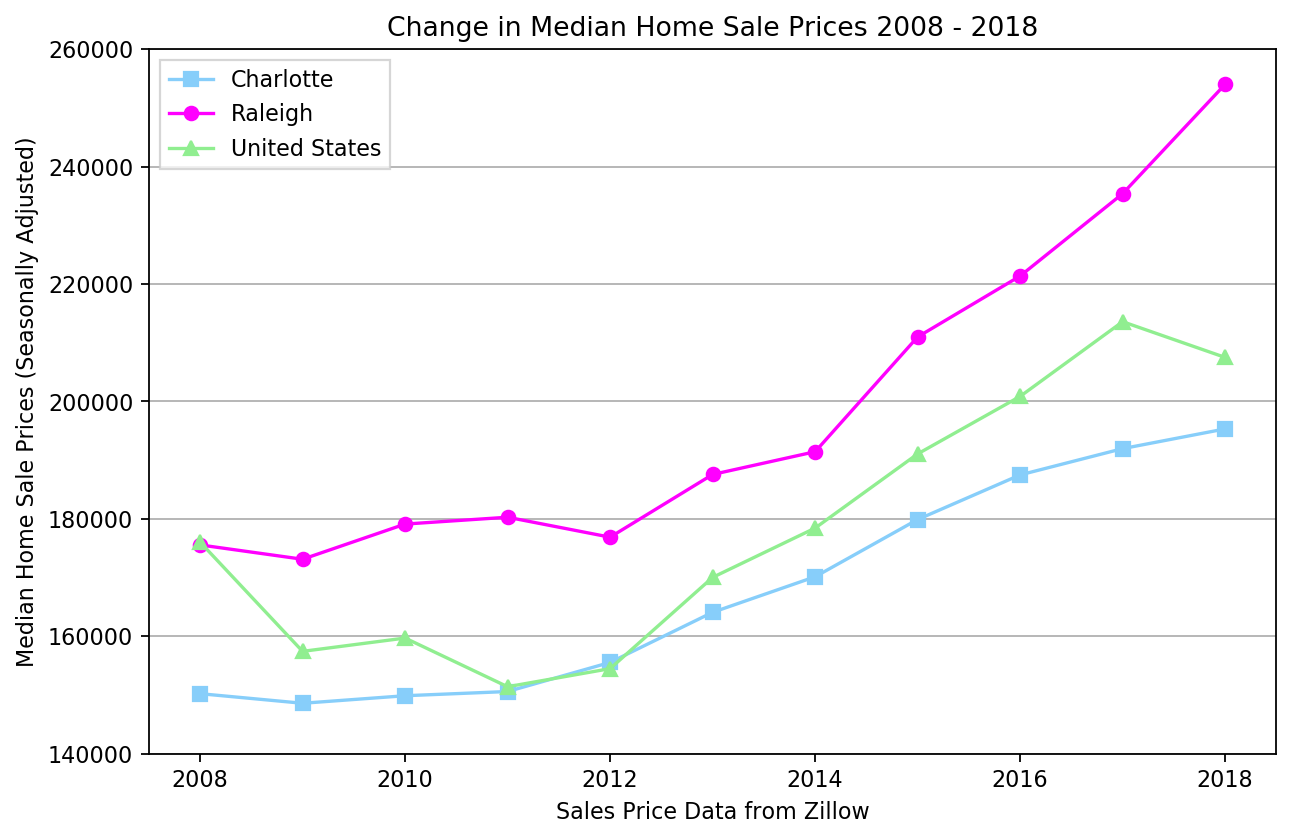

In [5]:
# median_price = data['Median Price']
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 5), dpi=160, facecolor='w', edgecolor='k')
# # plotting data
plt.plot(years,charlotte_data,color='lightskyblue', marker ='s', label = "Charlotte")
plt.plot(years,raleigh_data,color='magenta',marker = 'o', label = "Raleigh")
plt.plot(years,united_states, color = 'lightgreen', marker = '^', label = "United States")


legend = plt.legend(loc="upper left",ncol=1, shadow=False, fancybox=False, fontsize=10)


plt.ylim(140000, 260000)
plt.gca().yaxis.grid(True)
 
plt.tight_layout()
plt.ylabel("Median Home Sale Prices (Seasonally Adjusted)")
plt.xlabel("Sales Price Data from Zillow")
plt.title("Change in Median Home Sale Prices 2008 - 2018")


# # # saving figure
plt.savefig("Output/Median_Home_Prices", bbox_inches = 'tight')
plt.show()